In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## Motivating Linear Algebra

Linear algebra is the engine that powers everything from chatGPT, to predictive algorithms and recommendation systems, and even your favorite computer games. For any gamers out there, those GPUs are processors built to perform matrix operations really quickly. Actually, data science and the current AI boom are possible because of widespread interest in 3D-gaming. The hardware necessary to train these models was developed because of demand created by the gaming industry.

## What Can We Expect?

The subject of linear algebra is about collections of two or more linear equations and sets of solutions that satisfy all of those equations simultaneously. Google routinely deals with a set of trillions of equations with trillions of unknowns. Generally, we'll look at scenarios that are smaller and more manageable (between two and five equations and two and five unknowns), but Linear algebra gives us tools that scale to handling much larger scenarios like those at Google or running in real-time on a UAV.

### Contexts We'll Encounter

Problems from linear algebra take many different forms. The reasons these problems take different forms is sometimes due to the context that they arise from, and other times because we get different insights by analysing problems from different lenses. While we'll encounter many different contexts and utilize serveal different vantage points from which to view scenarios, we'll be recyclcing the same investigative/mathematical techniques over and over within each of these.

Some classes of problem we'll commonly encounter appear below.

+ **Systems of Linear Equations** of the form $\left\{\begin{array}{lcl} a_{11}x_1 + a_{12}x_2 + \cdots a_{1n}x_n & = & b_1\\
a_{21}x_1 + a_{22}x_2 + \cdots a_{2n}x_n & = & b_1\\
 & \vdots & \\
a_{m1}x_1 + a_{m2}x_2 + \cdots a_{mn}x_n & = & b_m
\end{array}\right.$ ask whether there are solutions $x_1,~x_2,~\cdots,~x_n$ satisfying the linear constraint equations making up the system.

  + *Goal*: Describe all of the values for $x_1,~x_2,\cdots,~x_n$ that satisfy the system, if such values exist.
+ **Vector Equations** of the form $c_1\vec{v_1} + c_2\vec{v_2} + \cdots + c_k\vec{v_k} = \vec{b}$ ask whether it is possible to arrive at location $\vec{b}$ in space, starting from the origin and using steps in the directions of $\vec{v_1},~\vec{v_2},\cdots,~\vec{v_k}$.

  + *Goal*: Describe all collections of scalars $c_1,~c_2,~\cdots,~c_k$ that satisfy the vector equation, if such scalars exist.
+ **Matrix Equations** of the form $A\vec{x} = \vec{b}$ ask whether there exists a vector $\vec{x}$ that can be sent to the vector $\vec{b}$ via matrix multiplication by $A$.

  + *Goal*: Describe all vectors $\vec{x}$ that make the vector equation true, if such vectors exist.
+ **Linear Transformations** of the form $T\left(\vec{x}\right) = \vec{b}$ are special types of functions that map vectors from one space into another space. It is natural to ask whether these functions are one-to-one, onto, or invertible just like you did in precalculus.

  + *Goal*: Gain insight into how vectors are mapped from the domain space into the codomain space. Such transformations have use in compression, projection, and beyond.

Throughout our course, we'll see that all of these contexts are linked together and can largely be solved/answered/analysed using the same procedures.

### Beginnings: Linear Systems

So where should we start our study of linear algebra? We'll encounter all of the contexts listed above throughout our course, but we'll begin with the context most likely to be familiar to you -- simultaneous systems of linear equations. That is, systems of the form

$$\left\{\begin{array}{lcl} a_{11}x_1 + a_{12}x_2 + \cdots a_{1n}x_n & = & b_1\\
a_{21}x_1 + a_{22}x_2 + \cdots a_{2n}x_n & = & b_1\\
 & \vdots & \\
a_{m1}x_1 + a_{m2}x_2 + \cdots a_{mn}x_n & = & b_m
\end{array}\right.$$

All those letters and subscripts make this look more foreign than it needs to. For example, check out the system of two equations in two variables below:

$$\left\{\begin{array}{lcl} 2x_1 + 4x_2 & = & 10\\
x_1 - x_2 & = & -1
\end{array}\right.$$

At this point, you may be more comfortable with the equivalent system

$$\left\{\begin{array}{lcl} 2x + 4y & = & 10\\
x - y & = & -1
\end{array}\right.$$

since it doesn't use subscripts. Generally, we are interested in solving very large systems in linear algebra though. We would run out of convenient variable names to use if we used a unique letter for each variable. For this reason, we'll typically use variable names of the form $x_i$. We can't run out of names for variables this way!

The systems you'll be dealing with in MAT350 will typically have between two and five variables, but systems involved in modeling real-world scenarios usually have hundreds, thousands, or even more variables. The techniques we learn here in MAT350 can be used to solve those systems, but it is not reasonable to do those computations by hand. If you want to learn more about efficiently solving large systems, consider taking MAT370 (Numerical Analysis) next semester.

## Solving Linear Systems

Throughout the rest of this notebook, we'll focus on building some intuition for solutions to problems in linear algebra, highlight some definitions and conventions, and then show how transitioning between system, vector, and matrix contexts can benefit our intuition for problems.

**Completed Example 1:** Solve the linear system $\left\{\begin{array}{rcr} 5x_1 + 3x_2 & = & 15\\
x_2 & = & -10\end{array}\right.$

> *Solution.* Notice that the second equation gives us that $\displaystyle{\boxed{~x_2 = -10~}}$ and, using this, we can subsititute into the first equation to find
>
>\begin{align*} 5x_1 + 3x_2 & = 15\\
\implies 5x_1 + 3\left(-10\right) & = 15\\
\implies 5x_1 - 30 &= 15\\
\implies 5x_1 &= 45\\
\implies x_1 &= 9
\end{align*}
>
>So we have $\displaystyle{\boxed{~x_1 = 9~}}$. That is, the solution to the system is $\displaystyle{\boxed{~x_1 = 9 \text{ and } x_2 = -10~}}$. $_\blacktriangledown$

>> **What This Really Means:** The two equations in the system above are *linear* equations in two variables. We know how to graph such equations.

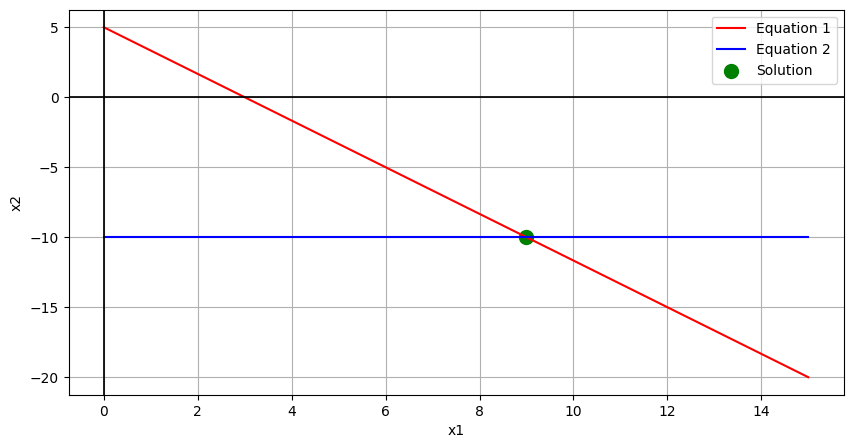

In [ ]:
# @title
x_vals = np.linspace(0, 15, 100)
sys1_y_vals = (15 - 5*x_vals)/3
sys2_y_vals = -10*np.ones(len(x_vals))

plt.figure(figsize = (10, 5))
plt.plot(x_vals, sys1_y_vals, color = "red", label = "Equation 1")
plt.plot(x_vals, sys2_y_vals, color = "blue", label = "Equation 2")
plt.grid()
plt.axhline(y = 0, color = "black", linestyle = "-", linewidth = 1.25)
plt.axvline(x = 0, color = "black", linestyle = "-", linewidth = 1.25)
plt.scatter(x = 9, y = -10, color = "green", marker = "o", s = 100, label = "Solution")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.show()

>> The solution to the system is the point at which the two lines cross in $\mathbb{R}^2$.

**Remark 1:** The system in Example 1 was easily solved because the second equation told us the value of $x_2$. If all systems were like this (or if we could somehow transform any system into a system like this one), then solving these linear systems would be simple.

**Try It! 1:** Solve the linear system $\left\{\begin{array}{rcr} 2x_1 + 5x_2 & = & 13\\
-2x_1 + 3x_2 & = & 11\end{array}\right.$

> *Solution.*
>
> 1. Start by adding the first and second equations together. This gives a new, equation $0x_1 + 8x_2 = 24$, or more simply $8x_2 = 24$.
> 2. Solve this new equation for $x_2$ to find that $x_2 = 3$.
> 3. Plug your newly discovered value of $x_2$ into either equation to eliminate one of the unknowns, resulting in a single equation with one unknown that can be solved for.
>
> \begin{align} 2x_1 + 5x_2 &= 13\\
\implies 2x_1 + 5\left(3\right) &= 13\\
\implies 2x_1 + 15 &= 13\\
\implies 2x_1 &= -2\\
\implies x_1 &= -1
\end{align}
>
> 4. Identify and describe the solutions we've discovered. From the work above, we see that a solution to the system exists and that solution is $\boxed{~\displaystyle{x_1 = -1} \text{ and } \displaystyle{x_2 = 3}~}$.


**Remark 2:** Okay, we were able to create an equivalent linear system by eliminating $x_1$ from our second equation. After doing this, this problem became just like Completed Example 1, and finding a solution was relatively simple!

## Solution Sets for Linear Systems

Given any linear system (no matter how many variables), three situations are possible regarding the corresponding solution set.

+ There is a single, unique solution.
+ There are infinitely many solutions.
+ There are no solutions.

**Example:** Consider the systems $\left\{\begin{array}{rcl} 2x_1 + 4x_2 &= & 10\\ x_1 - 3x_2 &= & 15\end{array}\right.$ (left), $\left\{\begin{array}{rcl} 2x_1 + 4x_2 &= & 10\\ 4x_1 +8x_2 &= & 15\end{array}\right.$ (middle), and $\left\{\begin{array}{rcl} 2x_1 + 4x_2 &= & 10\\ -4x_1 - 8x_2 &= & -20\end{array}\right.$ (right) which are plotted below.


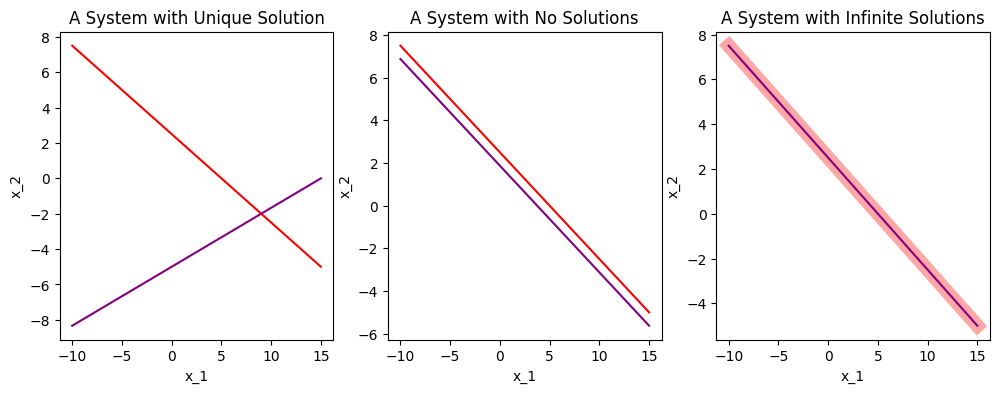

In [ ]:
#@title
x1_vals = np.linspace(-10, 15, 200)
sys1_x2_vals1 = (10 - 2*x1_vals)/4
sys1_x2_vals2 = (15 - x1_vals)/(-3)

sys2_x2_vals1 = (10 - 2*x1_vals)/4
sys2_x2_vals2 = (15 - 4*x1_vals)/8

sys3_x2_vals1 = (10 - 2*x1_vals)/4
sys3_x2_vals2 = (-20 + 4*x1_vals)/(-8)

plt.figure(figsize = (12, 4))
plt.subplot(1, 3, 1)
plt.plot(x1_vals, sys1_x2_vals1, color = "red")
plt.plot(x1_vals, sys1_x2_vals2, color = "purple")
plt.title("A System with Unique Solution")
plt.xlabel("x_1")
plt.ylabel("x_2")

plt.subplot(1, 3, 2)
plt.plot(x1_vals, sys2_x2_vals1, color = "red")
plt.plot(x1_vals, sys2_x2_vals2, color = "purple")
plt.title("A System with No Solutions")
plt.xlabel("x_1")
plt.ylabel("x_2")

plt.subplot(1, 3, 3)
plt.plot(x1_vals, sys3_x2_vals1, color = "red", linewidth = 10, alpha = 0.35)
plt.plot(x1_vals, sys3_x2_vals2, color = "purple")
plt.title("A System with Infinite Solutions")
plt.xlabel("x_1")
plt.ylabel("x_2")

plt.show()

**Note:** Each equation in the system above was an equation in two variables. That is, each equation corresponded to a line. Linear systems in more than two variables have equations corresponding to planes (in three variables) or hyperplanes (in more than three variables). We aren't able to visualize hyperplanes but they are "flat", non-curved objects.

## Terminology and Strategic Decisions

Having seen a couple of examples and identified the solution-scenarios we'll encounter, it's worth pausing to settle on strategy and terminology before moving forward.

1. **Convention for Writing linear Equations:** We'll write all of our linear equations to include all variable terms on the left side of the equation and pushing the constant term to the right. That is, we'll write $x_1 + 8x_2 = -7$ rather than $x_1 = -8x_2 -7$

  + *Why?* We can write any linear equation this way, regardless of the number of variables included or whether the line is vertical or horizontal. This choice provides ***consistency***.

2. **Terminology for Linear Equations:** Given a linear equation of the form $a_1x_1 + a_2x_2 + \cdots + a_nx_n = b$, we say that

  + $a_1, a_2,\cdots, a_n$ are the *coefficients*, sometimes called *scalars* or *weights* in different contexts.
  + $x_1, x_2,\cdots, x_n$ are the *variables* (or *unknowns*).
  + the constant $b$ is sometimes referred to as the *constant term*, *intercept*, or *right-hand side*.

3. **Systems of Linear Equations** (or **linear systems**) are a collection of linear equations written with a common set of unknowns and designed to be solved simultaneously.

4. **Solution for Linear Systems** (or **solution**) is a collection of scalars (numbers) $x_1 = s_1, x_2 = s_2, \cdots, x_n = s_n$ that satisfy all of the equations in the system simultaneously.

5. **Solution Space** (or **solution set**) for a linear system is the collection of all solutions to a given linear system.

  + Remember that for any give system we may have 0, 1, or infinitely many solutions. That is, the solution space is either empty, contains a single element, or contains infinitely many elements.

### Moving Problems to Different Contexts

As mentioned earlier, in Linear Algebra, we'll explore the same ideas across multiple different contexts (systems of linear equations, linear combinations of sets of vectors, matrix transformations, etc.). We'll even find scenarios where switching contexts makes a problem more intuitive. We'll highlight that idea here.

**Linear System Context:** We saw earlier that the linear system $\left\{\begin{array}{rcr} 2x_1 + 5x_2 & = & 13\\
-2x_1 + 3x_2 & = & 11\end{array}\right.$ had the solution $x_1 = -1$ and $x_2 = 3$. The meaning of the solution here was relatively intuitive and easy to visualize -- each equation in the system corresponds to a straight line, and the solution to the system is the point at which the two lines intersect.

**Vector Equation Context:** There's an alternative, equivalent way we can look at this system using vector language. The system above is equivalent to the vector equation $c_1\begin{bmatrix} 2\\ -2\end{bmatrix} + c_2\begin{bmatrix} 5\\ 3\end{bmatrix} = \begin{bmatrix} 13\\ 11\end{bmatrix}$. This equation asks how (and whether) we can start from the origin and take steps in the direction of the vector $\begin{bmatrix} 2\\ -2\end{bmatrix}$ and the vector $\begin{bmatrix} 5\\ 3\end{bmatrix}$ to arrive at the vector $\begin{bmatrix} 13\\ 11\end{bmatrix}$

### Moving Problems to Different Contexts

As mentioned earlier, one of the central themes in linear algebra is exploring the *same underlying ideas* across different contexts — such as systems of equations, linear combinations of vectors, and matrix transformations. Sometimes, switching contexts can make a problem easier to understand or more intuitive. Let's highlight that idea with an example.

#### Linear System Context

Consider again the system of linear equations:

$$\left\{\begin{array}{lcl}
2x_1 + 5x_2 & = & 13 \\
-2x_1 + 3x_2 & = & 11
\end{array}\right.$$

This system has a solution at $x_1 = -1$, $x_2 = 3$. In this context, each equation corresponds to a line in the plane, and the solution represents the point where the two lines intersect. This geometric interpretation is familiar and often easy to visualize.

#### Vector Equation Context

Now let's look at the same system from a vector perspective. The system is equivalent to the vector equation:

$$c_1 \begin{bmatrix} 2 \\ -2 \end{bmatrix} + c_2 \begin{bmatrix} 5 \\ 3 \end{bmatrix} = \begin{bmatrix} 13 \\ 11 \end{bmatrix}$$

This asks whether we can express the vector $\begin{bmatrix} 13 \\ 11 \end{bmatrix}$ as a linear combination of the two vectors $\begin{bmatrix} 2 \\ -2 \end{bmatrix}$ and $\begin{bmatrix} 5 \\ 3 \end{bmatrix}$.

Put differently: Can we start at the origin and reach the point $\begin{bmatrix} 13 \\ 11 \end{bmatrix}$ by taking some number of steps in the direction of the first vector and some number of steps in the direction of the second? The answer is yes — and the coefficients $c_1 = -1$ and $c_2 = 3$ tell us exactly how to do it. See the plot below for visual confirmation.

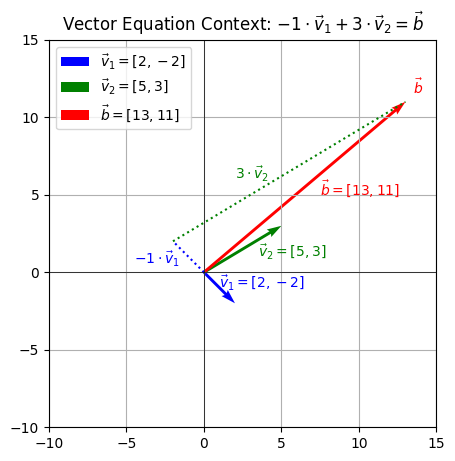

In [ ]:
# @title
# Base vectors
v1 = np.array([2, -2])
v2 = np.array([5, 3])
target = np.array([13, 11])

# Scaled vectors
v1_scaled = -1 * v1
v2_scaled = 3 * v2

# Setup plot
fig, ax = plt.subplots(figsize=(5, 8))
ax.set_xlim(-10, 15)
ax.set_ylim(-10, 15)
ax.set_aspect('equal')
ax.grid(True, which='both')

# Draw origin
origin = np.array([0, 0])

# Plot base vectors
ax.quiver(*origin, *v1, color='blue', angles='xy', scale_units='xy', scale=1, label=r'$\vec{v}_1 = [2, -2]$')
ax.quiver(*origin, *v2, color='green', angles='xy', scale_units='xy', scale=1, label=r'$\vec{v}_2 = [5, 3]$')
ax.annotate(r"$\vec{v}_1 = [2, -2]$", [1, - 1], color = "blue")
ax.annotate(r"$\vec{v}_2 = [5, 3]$", [3.5, 1], color = "green")

# Plot target vector
ax.quiver(*origin, *target, color='red', angles='xy', scale_units='xy', scale=1, label=r'$\vec{b} = [13, 11]$')
ax.annotate(r"$\vec{b} = [13, 11]$", [7.5, 5], color = "red")

# Plot dotted scaled vectors
ax.plot([origin[0], v1_scaled[0]], [origin[1], v1_scaled[1]], color='blue', linestyle='dotted')
ax.plot([v1_scaled[0], v1_scaled[0] + v2_scaled[0]], [v1_scaled[1], v1_scaled[1] + v2_scaled[1]], color='green', linestyle='dotted')

# Add labels for scaled vectors
ax.annotate(r'$-1 \cdot \vec{v}_1$', [-4.5, 0.5], color='blue')
ax.annotate(r'$3 \cdot \vec{v}_2$', [2, 6], color='green')

# Add label for target
ax.text(*target + np.array([0.5, 0.5]), r'$\vec{b}$', color='red')

# Axes lines
ax.axhline(0, color='black', linewidth=0.5)
ax.axvline(0, color='black', linewidth=0.5)

# Legend
ax.legend(loc='upper left')

plt.title("Vector Equation Context: $-1 \\cdot \\vec{v}_1 + 3 \\cdot \\vec{v}_2 = \\vec{b}$")
plt.show()

#### **Matrix Transformation Context**

We can also represent this system as a matrix transformation:

$$A \vec{x} = \vec{b}, \quad \text{where } A = \begin{bmatrix} 2 & 5 \\ -2 & 3 \end{bmatrix}, \quad \vec{x} = \begin{bmatrix} x_1 \\ x_2 \end{bmatrix}, \quad \vec{b} = \begin{bmatrix} 13 \\ 11 \end{bmatrix}$$

In this context, we think of the matrix $A$ as a function that takes the input vector $\vec{x}$ and transforms it into a new vector $\vec{b}$. The question becomes: What input vector $\vec{x}$ gets mapped to $\vec{b}$ under this transformation?

This lens is especially useful when studying properties like linear independence, rank, invertibility, and geometric transformations (such as rotations, reflections, and scalings) -- all of which we'll encounter later in our course. Here, we find that the input $\vec{x} = \begin{bmatrix} -1 \\ 3 \end{bmatrix}$ is mapped to the output $\vec{b}$, providing the same solution as before, but now interpreted through the lens of transformation.

***

The vector equation context becomes quite useful because, while it is hard to visualize the meaning of a solution set to the system
$$\left\{\begin{array}{lcl} 5x_1 + 4x_2 - 2x_3 + x_4 & = & 8\\
-x_1 + x_2 - x_3 + x_4 & = & 5\\
-4x_1 + 3x_2 + 8x_3 - 4x_4 & = & -7\\
2x_1 + 3x_2 - x_3 - x_4 & = & -12\end{array}\right.$$

It is much easier to grasp the meaning of the solution set to the vector equation

$$c_1\begin{bmatrix} 5\\ -1\\ -4\\ 2\end{bmatrix} + c_2\begin{bmatrix} 4\\ 1\\ 3\\ 3\end{bmatrix} + c_3\begin{bmatrix} -2\\ -1\\ 8\\ -1\end{bmatrix} + c_4\begin{bmatrix} 1\\ 1\\ -4\\ -1\end{bmatrix} = \begin{bmatrix} 8\\ 5\\ -7\\ -12\end{bmatrix}$$

We have four directional vectors that we can walk in -- and we wonder whether we can arrive at a particular point in space.